# Vykreslení fraktálu pomocí rekruze

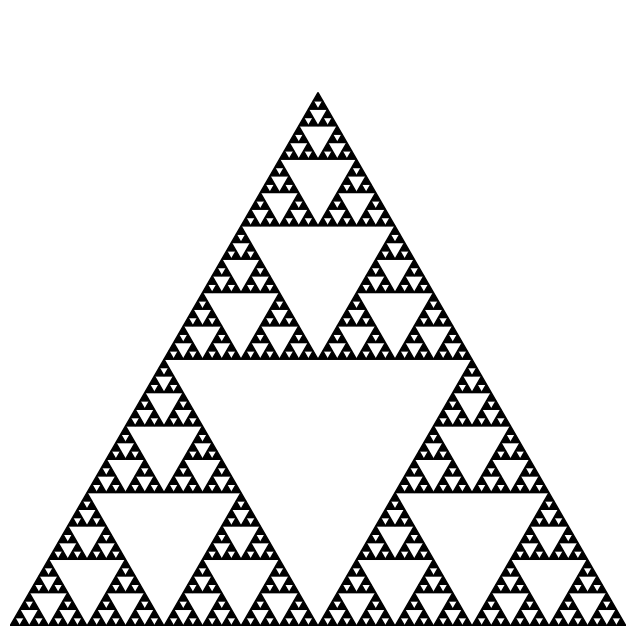

In [43]:
import numpy as np

import matplotlib.pyplot as plt

def sierpinski(ax, vertices, depth):
    if depth == 0:
        triangle = plt.Polygon(vertices, edgecolor='black', facecolor='black')
        ax.add_patch(triangle)
        return
    # spočti středy stran
    A, B, C = map(np.array, vertices)
    AB = (A + B) / 2
    BC = (B + C) / 2
    CA = (C + A) / 2
    # rekurzivně vykresli 3 menší trojúhelníky (prostřední zůstane prázdný)
    sierpinski(ax, [A, AB, CA], depth - 1)
    sierpinski(ax, [AB, B, BC], depth - 1)
    sierpinski(ax, [CA, BC, C], depth - 1)

# Konfigurace a vykreslení
fig, ax = plt.subplots(figsize=(8, 8))
# základní rovnostranný trojúhelník
vertices = [(0, 0), (1, 0), (0.5, np.sqrt(3) / 2)]
depth = 6  # upravte pro více/ méně detailu (např. 0..8)
sierpinski(ax, vertices, depth)

ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [44]:
def faktorial(n):
    if n == 0:
        return 1
    else:
        return n * faktorial(n - 1)

In [45]:
faktorial(5)  # Výsledek: 120

120

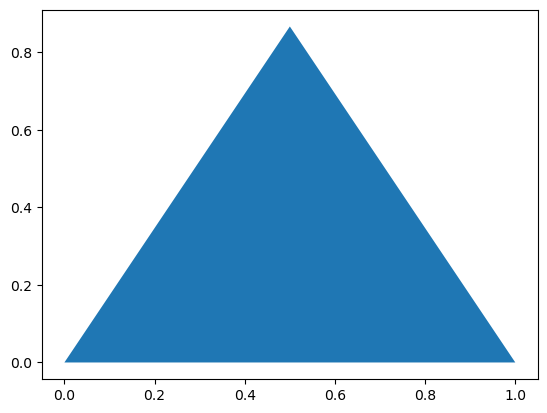

In [46]:
plt.fill([0, 1, 0.5], [0, 0, np.sqrt(3)/2])

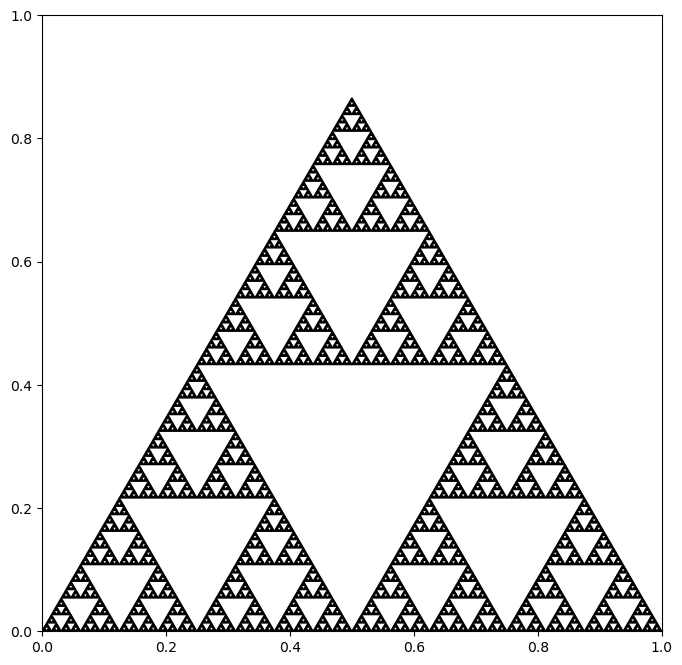

In [47]:
def sierpinski(ax, vertices, depth):
    if depth == 0:
        triangle = plt.Polygon(vertices, edgecolor='black', facecolor='black')
        ax.add_patch(triangle)
        return
    # spočti středy stran
    A, B, C = map(np.array, vertices)
    AB = (A + B) / 2
    BC = (B + C) / 2
    CA = (C + A) / 2
    # rekurzivně vykresli 3 menší trojúhelníky (prostřední zůstane prázdný)
    sierpinski(ax, [A, AB, CA], depth - 1)
    sierpinski(ax, [AB, B, BC], depth - 1)
    sierpinski(ax, [CA, BC, C], depth - 1)

fig, ax = plt.subplots(figsize=(8, 8))
# základní rovnostranný trojúhelník
vertices = [(0, 0), (1, 0), (0.5, np.sqrt(3) / 2)]
depth = 7
sierpinski(ax, vertices, depth)
plt.show()

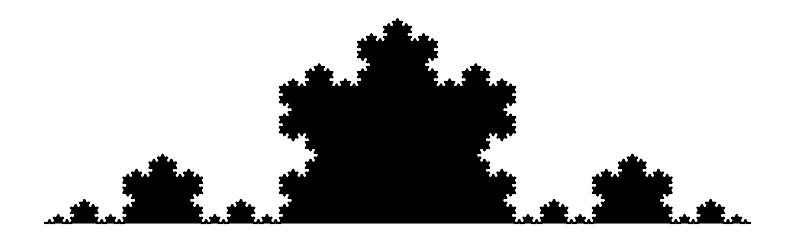

In [56]:
def koch_on_segment(ax, p1, p2, n):
    p1 = np.array(p1, dtype=float)
    p2 = np.array(p2, dtype=float)
    if n == 0:
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black')
        return
    A = p1
    D = p2
    B = A + (D - A) / 3.0
    C = A + 2.0 * (D - A) / 3.0

    v = C - B
    norm_v = np.linalg.norm(v)
    if norm_v == 0:
        return
    mid = (B + C) / 2.0
    height = norm_v * np.sqrt(3) / 2.0
    perp = np.array([-v[1], v[0]])
    perp = perp / np.linalg.norm(perp) * height

    # vrchol trojúhelníku 
    P = mid + perp

    # vykreslíme trojúhelník na střední třetině
    tri = plt.Polygon([B, P, C], edgecolor='black', facecolor='black')
    ax.add_patch(tri)

    # rekurzivně na 4 dílčí úsečky (A-B, B-P, P-C, C-D)
    koch_on_segment(ax, A, B, n - 1)
    koch_on_segment(ax, B, P, n - 1)
    koch_on_segment(ax, P, C, n - 1)
    koch_on_segment(ax, C, D, n - 1)

fig, ax = plt.subplots(figsize=(10, 10))
koch_depth = 5
a = (0, 0)
b = (1, 0)
koch_on_segment(ax, a, b, koch_depth)

ax.set_aspect('equal')
ax.axis('off')
plt.show()